<a href="https://colab.research.google.com/github/Alphy2194/AlfonceProject/blob/master/CLOTHES_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Image Classification with CNN**

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

**Load the Fashion MNIST dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Normalize the image data to range between 0 and 1:**

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

**Reshape the data to fit the model input requirements:**

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

**Convert the labels into one-hot vectors:**

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Design a convolutional neural network (CNN) suitable for classifying the images:**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Compile your model with an appropriate optimizer, loss function, and metrics:**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train your model on the training data:**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 77s 40ms/step - loss: 0.5048 - accuracy: 0.8148 - val_loss: 0.3760 - val_accuracy: 0.8661
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3269 - accuracy: 0.8799 - val_loss: 0.3554 - val_accuracy: 0.8700
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2794 - accuracy: 0.8967 - val_loss: 0.2874 - val_accuracy: 0.8965
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2483 - accuracy: 0.9074 - val_loss: 0.2719 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2235 - accuracy: 0.9157 - val_loss: 0.2751 - val_accuracy: 0.8996
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2033 - accuracy: 0.9236 - val_loss: 0.2809 - val_accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1865 - accuracy: 0.9309 - val_loss: 0.2677 -

**Evaluate the model's performance on the test dataset:**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.2805 - accuracy: 0.9126
Test accuracy: 0.9125999808311462


**Plot the training and validation accuracy and loss over epochs:**

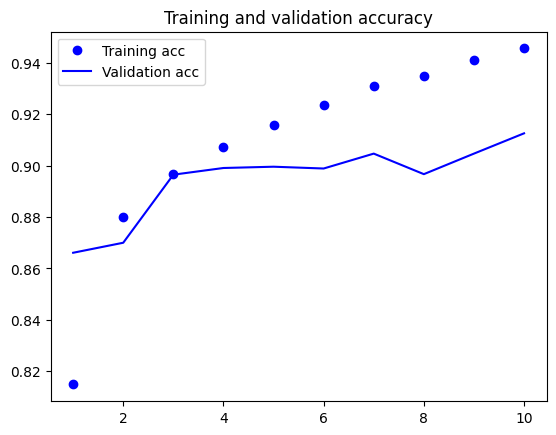

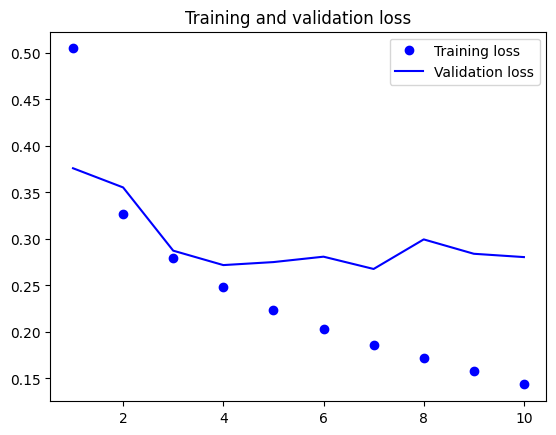

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**This code is used to display the predicted class names rather than numeric labels, you create a list of class names corresponding to the indices and use that information in the set_title function:**

1/1 [==============================] - 0s 27ms/step


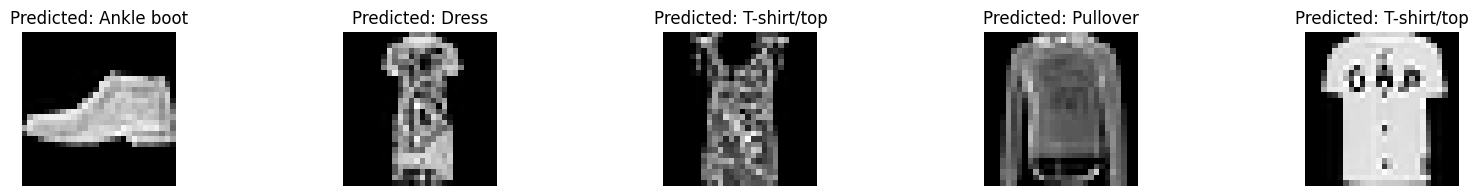

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def display_sample_predictions_with_names(num_samples=5):
    indices = np.random.choice(range(len(test_images)), num_samples)
    predictions = model.predict(test_images[indices])

    # Display the images and their predicted class names
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))

    for img, prediction, ax in zip(test_images[indices], predictions, axes):
        ax.imshow(img.squeeze(), cmap='gray')  # Assuming images are 2D, not 3D
        predicted_class_name = class_names[np.argmax(prediction)]
        ax.set_title(f'Predicted: {predicted_class_name}')
        ax.axis('off')

# Call the function with the desired number of samples
display_sample_predictions_with_names(num_samples=5)
plt.show()  # Make sure to include this line to actually display the plot
